In [14]:
from IPython.display import display, Math, Latex


Defines an algorithm that aims to directly minimize the DeepBoost generalization bound from Deep Boosting [Cortes et al., ICML 2014] when applied to neural networks. This algorithm, called AdaNet, adaptively grows a neural network as an ensemble ofsubnetworks that minimizes the AdaNet objective (a.k.a. AdaNet loss):

$$F(w) = \frac{1}{m} \sum_{i=1}^{m} \Phi \left(\sum_{j=1}^{N}w_jh_j(x_i), y_i \right) + \sum_{j=1}^{N} \left(\lambda r(h_j) + \beta \right) |w_j| $$

where $w$ is the set of mixture weights, one per subnetwork $h$, $\Phi$ is a surrogate loss function such as logistic loss or MSE, $r$ is a function for measuring a subnetwork's complexity, and $\lambda$ and $\beta$ are hyperparameters.


This objective function serves two purposes:
To learn to scale/transform the outputs of each subnetwork $h$ as part of the ensemble.
To select the best candidate subnetwork $h$ at each AdaNet iteration to include in the ensemble.
Effectively, when learning mixture weights $w$ AdaNet solves a convex combination of the outputs of the frozen subnetworks $h$. For $$\lambda \gt 0,$$ AdaNet penalizes more complex subnetworks with greater L1 regularization on their mixture weight, and will be less 
likely to select more complex subnetworks to add to the ensemble at each iteration.


We will solve a regression task known as the Boston Housing dataset to predict the price of suburban houses in Boston. There are $13$ numerical features, the labels are in thousands of dollars, and 506 examples.



In this project written for the Insight Artificial Intelligence project, we study the impact in the loss, produced by the combined weighting of the network ensemble using uniform weights, or either using convex optimization to calculate the optimum weights, and simulateneously control this effect with the regularizing parameter $\lambda$. 

In [15]:
%%capture
import matplotlib.pyplot as plt
import tensorflow as tf
import trainAndEvaluate
import numpy as np

# @title AdaNet parameters
LEARNING_RATE = 0.001       # @param {type:"number"}
TRAIN_STEPS = 100000        # @param {type:"integer"} 100000
BATCH_SIZE = 32             # @param {type:"integer"}
BOOSTING_ITERATIONS = 5     # @param {type:"integer"} Boosting iterations ==> Network depth.

# Testing the AdaNet architecture for the Boston Housing Dataset.
# 1. Load data
(x_train, y_train), (x_test, y_test) = (
    tf.keras.datasets.boston_housing.load_data())

# 2. Training and evaluating the model.

# 2. a. -Train with no optimization of the mixture weights.
#       -Lambda=0;
#       -Increasing size of the different networks.
#       -Constant learning rate, and constant batch size.

# Experiments


def training_results(x_tr, y_tr, x_tst, y_tst, a_lambda, learn_mixtures):
    results, _ = trainAndEvaluate.train_and_evaluate(x_tr, y_tr, x_tst, y_tst,
                                                     LEARNING_RATE,
                                                     TRAIN_STEPS,
                                                     BATCH_SIZE,
                                                     learn_mixtures,
                                                     a_lambda,
                                                     boosting_iterations=BOOSTING_ITERATIONS)
    print("Architecture:", trainAndEvaluate.ensemble_architecture(results))
    print(results["average_loss"])
    print("Uniform average loss:", results["average_loss/adanet/uniform_average_ensemble"])
    print("Adanet lambda", a_lambda)
    return [results["average_loss"], results["average_loss/adanet/uniform_average_ensemble"]]


# Training without learning mixtures of deep networks, learn_mixtures = false
# lambda = [0.1, 0.15, 0.2, 0.25 ... 1]

loss_results = []
uniform_loss_results = []
adanet_lambda = np.linspace(0, 1, 11)
learnMixtures = True

# Training the ensemble, and calculating losses
for l in adanet_lambda:
    loss = training_results(x_train, y_train, x_test, y_test, l, learnMixtures)[0]
    uniform_loss = training_results(x_train, y_train, x_test, y_test, l, learnMixtures)[1]
    loss = float("{0:.2f}".format(loss))
    uniform_loss_results.append(uniform_loss)
    loss_results.append(loss)


print(adanet_lambda)
print(loss_results)
print(uniform_loss_results)

ERROR:root:Line magic function `%matpolotlib` not found.


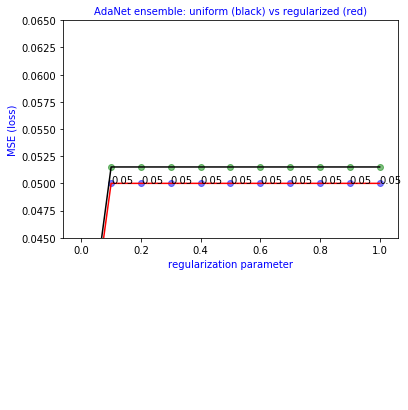

In [ ]:
%matplotlib inline
# Plotting results

plt.ioff()
epsilon = 1e-2

fig, ax = plt.subplots()
ax.scatter(adanet_lambda, loss_results, color="blue", alpha=0.5)
ax.scatter(adanet_lambda, uniform_loss_results, c="green", alpha=0.5, )

for i, txt in enumerate(loss_results):
    ax.annotate(txt, (adanet_lambda[i], loss_results[i]))

title = "AdaNet ensemble: uniform (black) vs regularized (red)"
ax.plot(adanet_lambda, loss_results, color="red")

ax.plot(adanet_lambda, uniform_loss_results, color="black")
l_range = np.linspace(0, 1, 6)

plt.title(title, color="b", size="medium")
plt.xlabel("regularization parameter", color="b", size="medium")
plt.ylabel("MSE (loss)", color="b", size="medium")
plt.xticks(l_range)

plt.ylim([0.045, 0.065])
plt.draw()
plt.show()
